In [2]:
library(dplyr)
library(readr)
library(ggplot2)

In [3]:
options(repr.plot.height=5)
options(repr.matrix.max.rows=20)
options(repr.matrix.max.columns=10)

In [81]:
usersLK = read_delim("data/lk1m/users.dat", delim=":",
                   col_names=c("user", "gender", "age", "occupation", "zip"),
                   col_types="i_c_c_c_c") %>%
    mutate(gender=as.factor(gender),
           age=as.factor(age),
           occupation=as.factor(occupation))
usersLK <-  subset(usersLK, select = c("user", "gender", "age"))
usersLK$dataset = as.factor("Lenskit-1m")
usersLK
unique(usersLK$age)

user,gender,age,dataset
1,F,1,Lenskit-1m
2,M,56,Lenskit-1m
3,M,25,Lenskit-1m
4,M,45,Lenskit-1m
5,M,25,Lenskit-1m
6,F,50,Lenskit-1m
7,M,35,Lenskit-1m
8,M,25,Lenskit-1m
9,M,25,Lenskit-1m
10,F,35,Lenskit-1m


[1] 1  56 25 45 50 35 18
Levels: 1 18 25 35 45 50 56

[1] 1  56 25 45 50 35 18
Levels: 1 18 25 35 45 50 56

In [85]:
#id,key,gender,age

usersLastfm = read_delim("data/lastfm/lastfm-users.csv", delim=",", 
                   col_names=c("user", "key", "gender", "age") )
usersLastfm <-  subset(usersLastfm, select = c("user", "gender", "age"))
#usersLastfm$age <- as.integer(usersLastfm$age)
usersLastfm$age <- as.numeric(as.character(usersLastfm$age))
usersLastfm$gender[usersLastfm$gender == "f"] <- "F"
usersLastfm$gender[usersLastfm$gender == "m"] <- "M"
usersLastfm$age[ as.numeric(usersLastfm$age) < 18] <- 1
usersLastfm$age[as.numeric(usersLastfm$age) >= 18 & as.numeric(usersLastfm$age) < 25] <- 18
usersLastfm$age[as.numeric(usersLastfm$age) >= 25 &  as.numeric(usersLastfm$age) < 35] <- 25
usersLastfm$age[as.numeric(usersLastfm$age) >= 35 &  as.numeric(usersLastfm$age) < 45] <- 35
usersLastfm$age[as.numeric(usersLastfm$age) >= 45 & as.numeric(usersLastfm$age) < 56] <- 45
usersLastfm$age[as.numeric(usersLastfm$age) >= 56 ] <- 56
usersLastfm$dataset = as.factor("LastFM")
usersLastfm$age = as.factor(usersLastfm$age)
usersLastfm
unique(usersLastfm$age)

Parsed with column specification:
cols(
  user = col_integer(),
  key = col_character(),
  gender = col_character(),
  age = col_integer()
)


user,gender,age,dataset
1,F,18,LastFM
2,F,NA,LastFM
3,NA,NA,LastFM
4,M,18,LastFM
5,M,25,LastFM
6,M,18,LastFM
7,M,1,LastFM
8,F,18,LastFM
9,F,18,LastFM
10,M,NA,LastFM


[1] 18   <NA> 25   1    45   56   35  
Levels: 1 18 25 35 45 56

In [91]:
users <- rbind(usersLK, usersLastfm)
users

user,gender,age,dataset
1,F,1,Lenskit-1m
2,M,56,Lenskit-1m
3,M,25,Lenskit-1m
4,M,45,Lenskit-1m
5,M,25,Lenskit-1m
6,F,50,Lenskit-1m
7,M,35,Lenskit-1m
8,M,25,Lenskit-1m
9,M,25,Lenskit-1m
10,F,35,Lenskit-1m


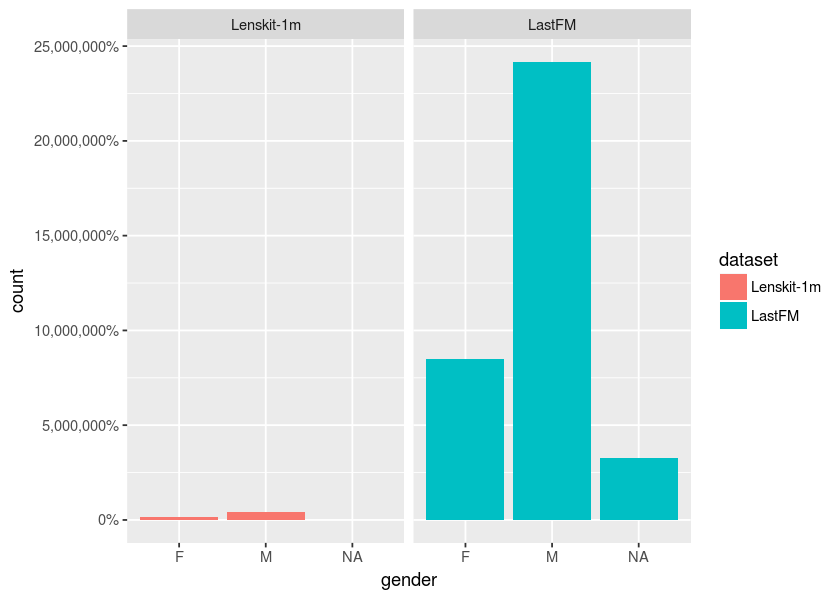

In [102]:
ggplot(users) +
    aes(x=gender,fill=dataset) + scale_y_continuous(labels = scales::percent)+
    geom_bar()+facet_grid(. ~ dataset)

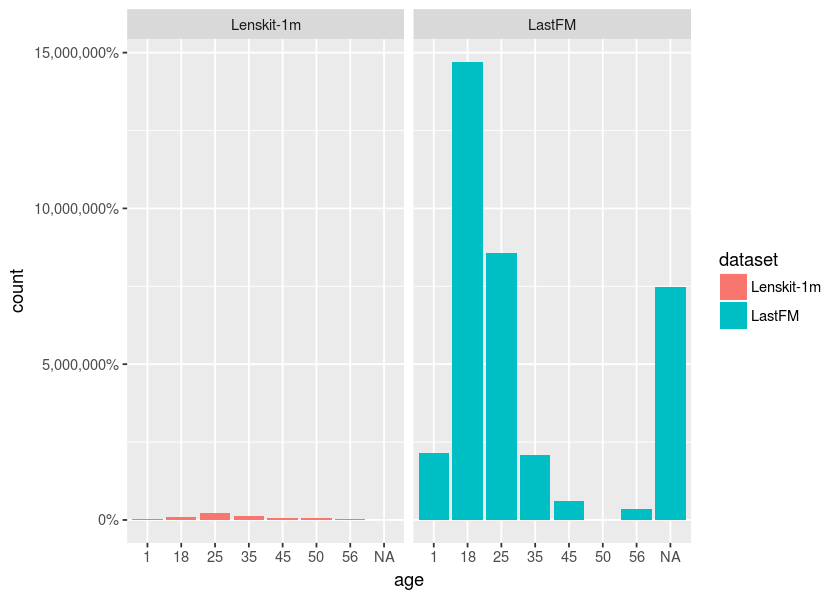

In [98]:
ggplot(users) +
    aes(x=age,fill=dataset) + scale_y_continuous(labels = scales::percent)+
    geom_bar()+facet_grid(. ~ dataset)